Clustering Homework
Charasphong Theprod 6030826721

In [1]:
import pandas as pd 
import numpy as np
import datetime as dt

In [8]:
firedata = pd.read_csv('Fire_Data.csv')

In [11]:
firedata.head()

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,TIME
0,1,16.33696,98.70137,334.5,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,303.4,5.8,0,2019-01-12 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,306.3,6.4,0,2019-01-12 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,305.0,3.8,0,2019-01-12 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,306.0,4.6,0,2019-01-12 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,1/12/2019 00:00,635,N,VIIRS,n,1,303.9,3.1,0,2019-01-12 06:35:00


In [10]:
# Change ACQ_TIME and ACQ_DATE to be datetime format on pandas
firedata['TIME'] = firedata['ACQ_TIME']
firedata['TIME'] = firedata['TIME'].astype(str).str.zfill(4)
firedata['TIME'] = firedata['TIME'].str.slice(stop=2)+':'+firedata['TIME'].str.slice(start=2)
firedata['TIME'] = pd.to_datetime(firedata['ACQ_DATE'].astype(str)+' '+firedata['TIME'])

In [17]:
firedata['TIME']

0       2019-01-12 06:35:00
1       2019-01-12 06:35:00
2       2019-01-12 06:35:00
3       2019-01-12 06:35:00
4       2019-01-12 06:35:00
                ...        
79229   2020-04-04 20:03:00
79230   2020-04-04 20:03:00
79231   2020-04-04 20:03:00
79232   2020-04-04 20:03:00
79233   2020-04-04 20:03:00
Name: TIME, Length: 79234, dtype: datetime64[ns]

In [21]:
# Find different time
firedata['DIF_TIME'] = firedata['TIME'] - firedata['TIME'].iloc[0]
firedata['datetime_numeric'] = (firedata['DIF_TIME'].dt.total_seconds())/86400

In [23]:
# 7 days data
days7 = firedata[["LATITUDE","LONGITUDE","datetime_numeric"]].head(717)

In [37]:
days7

,LATITUDE,LONGITUDE,datetime_numeric
0,16.33696,98.70137,0.000000
1,16.48906,98.73961,0.000000
2,16.93571,99.06874,0.000000
3,16.54092,98.59869,0.000000
4,16.87473,98.63222,0.000000
...,...,...,...
712,17.07450,98.38679,181.513194
713,17.40994,99.13846,181.513194
714,16.40887,98.64652,181.513194
715,18.47282,99.13702,181.513194


In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt

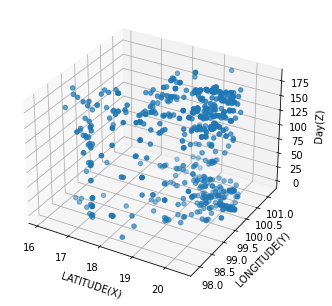

In [40]:
#Plot LATITUDE, LONGITUDE, datetime_numeric
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
a = Axes3D(fig)
a.scatter(days7['LATITUDE'], days7['LONGITUDE'], days7['datetime_numeric'])
a.set_xlabel('LATITUDE(X)')
a.set_ylabel('LONGITUDE(Y)')
a.set_zlabel('Day(Z)')
plt.show()

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [29]:
lat7 = np.array(days7.values.tolist())
lat7

array([[ 16.33696   ,  98.70137   ,   0.        ],
       [ 16.48906   ,  98.73961   ,   0.        ],
       [ 16.93571   ,  99.06874   ,   0.        ],
       ...,
       [ 16.40887   ,  98.64652   , 181.51319444],
       [ 18.47282   ,  99.13702   , 181.51319444],
       [ 18.69487   ,  98.34657   , 181.51319444]])

In [30]:
db = DBSCAN(eps=1, min_samples=20).fit(lat7)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dblabels = db.labels_
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_noise_ = list(dblabels).count(-1)

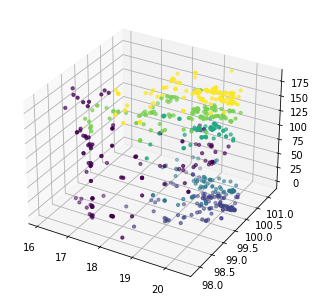

In [31]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lat7[:,0], lat7[:,1], lat7[:,2], c=dblabels, s=10)
#ax.view_init(azim=200)
plt.show()

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score
print('silhouette_score :',silhouette_score(lat7, dblabels))

silhouette_score : 0.7102974215549793


จากการจัดลุ่มข้อมูลโดยใช้เทคนิค DBSCAN (Density Based) กำหนดค่าดังนี้ 1. eps =  1 เนื่องจากแกน x,y มี range ค่อนข้างแคบ ถ้ากำหนดมากเกินไปค่า difference ระหว่างช่วงจะไม่สัมพันธ์กับค่า days ซึ่งเปลี่ยนเป็นเวลา timediff แบบชั่วโมง 2. minPoints : /0 จะเห็นว่าจากการจัดกลุ่มได้ค่า Silhoulette score = 0.7102974215549793 ซึ่งมีค่าเข้าใกล้ 1 หมายความว่าแบบจำลองค่อนข้างดี จัดกลุ่มได้ค่อนข้างเหมาะสมกับข้อมูล แต่ก็ยังมีข้อมูลบางส่วนที่กระจายตัวค่อนข้างห่างกันจึงไม่ได้รับการจัดกลุ่ม ซึ่งถูกถือว่าเป็น outliers ในรูปก็คือกลุ่มจุดที่เป็นสีม่วง